# 3. Create DataFrame of NDVI Timeseries
*Written by Men Vuthy, 2021*

---

**Import modules**

In [1]:
import rasterio
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import os
import glob

**Create DataFrame**

In [2]:
# Read data
NDVI_Images = rasterio.open('output/1/mosaic_img/NDVI_2011.tif').read()

# Reshape from array to list
NDVI_list = []

for array in NDVI_Images:
    ndvi_by_day = array.reshape(-1)
    NDVI_list.append(ndvi_by_day)

# Create dataframe of timeseries data
NDVI_DataFrame = pd.DataFrame(NDVI_list)

**Interpolation to eliminate NaN inside timeseries**

In [3]:
# Interpolate based on Polynomial
NDVI_DataFrame = NDVI_DataFrame.interpolate(method='polynomial', order=2)
NDVI_DataFrame = NDVI_DataFrame.T
NDVI_DataFrame

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Extract date of each image**

In [4]:
file_path = "input/ndvi_2011"

# Make a search criteria to select the ndvi files
q = os.path.join(file_path, "20*.tif")

# sorted files by name
ndvi_fps = sorted(glob.glob(q)) 

# List of date of ndvi image
img_date = []
for file in ndvi_fps:
    name = os.path.basename(file)
    name_ver2 = name.replace("_","/")
    name_ver3 = name_ver2.replace(".tif","")
    img_date.append(name_ver3)
    
print(img_date)

['2010/01/01', '2010/01/17', '2010/02/02', '2010/02/18', '2010/03/06', '2010/03/22', '2010/04/07', '2010/04/23', '2010/05/09', '2010/05/25', '2010/06/10', '2010/06/26', '2010/07/12', '2010/07/28', '2010/08/13', '2010/08/29', '2010/09/14', '2010/09/30', '2010/10/16', '2010/11/01', '2010/11/17', '2010/12/03', '2010/12/19', '2011/01/01', '2011/01/17', '2011/02/02', '2011/02/18', '2011/03/06', '2011/03/22', '2011/04/07', '2011/04/23', '2011/05/09', '2011/05/25', '2011/06/10', '2011/06/26', '2011/07/12', '2011/07/28', '2011/08/13', '2011/08/29', '2011/09/14', '2011/09/30', '2011/10/16', '2011/11/01', '2011/11/17', '2011/12/03', '2011/12/19', '2012/01/01', '2012/01/17', '2012/02/02', '2012/02/18', '2012/03/05', '2012/03/21', '2012/04/06', '2012/04/22', '2012/05/08', '2012/05/24', '2012/06/09', '2012/06/25', '2012/07/11', '2012/07/27', '2012/08/12', '2012/08/28', '2012/09/13', '2012/09/29', '2012/10/15', '2012/10/31', '2012/11/16', '2012/12/02', '2012/12/18']


In [5]:
from datetime import datetime

date_frame = pd.DataFrame(img_date)
date_frame

date_img = []
for date in date_frame[0]:
    datetime_object = datetime.strptime(date, '%Y/%m/%d').date()
    date_img.append(datetime_object)

date_img = (date_img)
date_img = [datetime.strftime(i,'%Y/%b/%d') for i in date_img]
NDVI_DataFrame.columns = date_img

# drop rows with nan in all columns
NDVI_DataFrame.dropna(subset = NDVI_DataFrame.columns, inplace=True)

DF_NDVI = NDVI_DataFrame.T

In [6]:
# Save Date
date = pd.DataFrame(date_img)
date.to_csv('output/2/date_img/date_img.csv', index=False)

**Save result as csv**

In [7]:
DF_NDVI.to_csv('output/2/timeseries/timeseries_ndvi.csv', index=False)

**Visualize data**

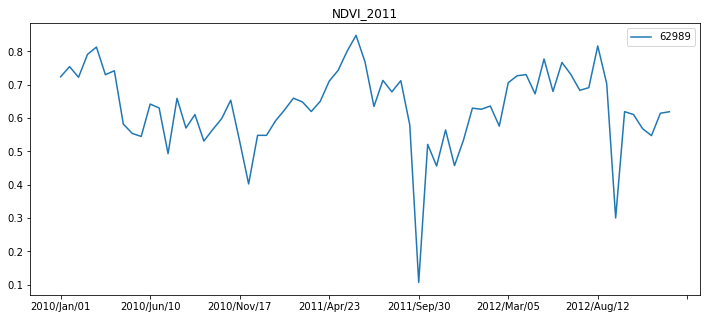

In [8]:
fig, ax = plt.subplots(figsize=(12,5))
ax = DF_NDVI.iloc[:,5000:5001].plot(ax=ax)
ax.set_title('NDVI_2011')
plt.show();

---